In [114]:
import mglearn
import matplotlib.pyplot as plt

import numpy as np
import pandas
plt.rcParams['image.cmap'] = "gray"

# Unsupervised Learning and Preprocessing

### Types of unsupervised learning

### Challenges in unsupervised learning

### Preprocessing and Scaling

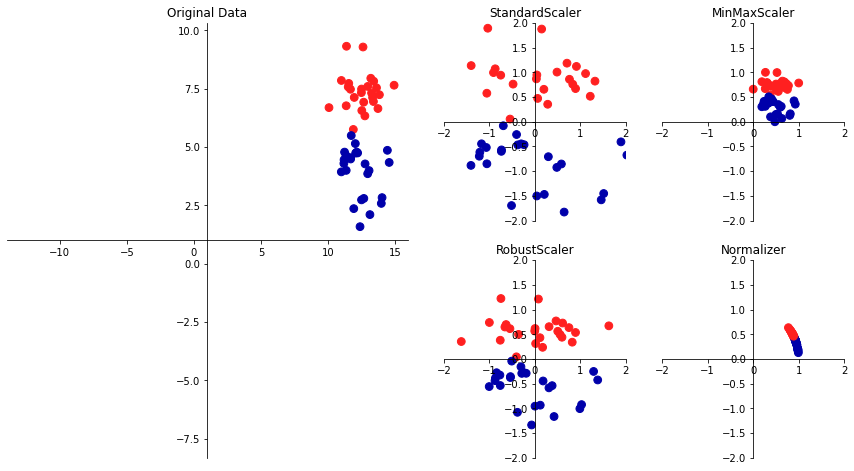

In [8]:
mglearn.plots.plot_scaling()

In [115]:
data = pd.read_csv('/Users/chenyuxun/Downloads/kidney_disease.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

data.head()


 	 The data frame has 400 rows and 26 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    float64
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null  

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.020,4,0,abnormal,normal,notpresent,notpresent,...,38,6000,5.5,no,no,no,good,no,no,ckd
2,2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,4.6,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [116]:
data_c = pd.get_dummies(data, columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
# data_c = data_c.drop('classification', axis=1)
print(data_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    float64
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   bgr             400 non-null    int64  
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    int64  
 13  wc              400 non-null    int64  
 14  rc              400 non-null    float64
 15  classification  400 non-null    object 
 16  rbc_abnormal    400 non-null    uint8  
 17  rbc_normal      400 non-null    uin

#### Different Kinds of Preprocessing

#### Applying Data Transformations

In [140]:
a=data_c.drop(columns=['classification'])
print(a)

      id  age  bp     sg  al  su  bgr    bu   sc    sod  ...  dm_yes  \
0      0   48  80  1.020   1   0  121  36.0  1.2  120.0  ...       1   
1      1    7  50  1.020   4   0  153  18.0  0.8  148.0  ...       0   
2      2   62  80  1.010   2   3  423  53.0  1.8  120.0  ...       1   
3      3   48  70  1.005   4   0  117  56.0  3.8  111.0  ...       0   
4      4   51  80  1.010   2   0  106  26.0  1.4  145.0  ...       0   
..   ...  ...  ..    ...  ..  ..  ...   ...  ...    ...  ...     ...   
395  395   55  80  1.020   0   0  140  49.0  0.5  150.0  ...       0   
396  396   42  70  1.025   0   0   75  31.0  1.2  141.0  ...       0   
397  397   12  80  1.020   0   0  100  26.0  0.6  137.0  ...       0   
398  398   17  60  1.025   0   0  114  50.0  1.0  135.0  ...       0   
399  399   58  80  1.025   0   0  131  18.0  1.1  141.0  ...       0   

     cad_\tno  cad_no  cad_yes  appet_good  appet_poor  pe_no  pe_yes  ane_no  \
0           0       1        0           1           0

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(a, data_c.classification,random_state=1)
print(X_train.shape)
print(X_test.shape)


(300, 39)
(100, 39)


In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [143]:
scaler.fit(X_train)

MinMaxScaler()

In [124]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (300, 39)
per-feature minimum before scaling:
 id                   0.000
age                  2.000
bp                  50.000
sg                   1.005
al                   0.000
su                   0.000
bgr                 70.000
bu                  10.000
sc                   0.300
sod                  4.500
pot                  2.300
hemo                 3.100
pcv                  9.000
wc                2200.000
rc                   2.100
rbc_abnormal         0.000
rbc_normal           0.000
pc_abnormal          0.000
pc_normal            0.000
pcc_notpresent       0.000
pcc_present          0.000
ba_notpresent        0.000
ba_present           0.000
htn_no               0.000
htn_yes              0.000
dm_\tno              0.000
dm_\tyes             0.000
dm_ yes              0.000
dm_no                0.000
dm_yes               0.000
cad_\tno             0.000
cad_no               0.000
cad_yes              0.000
appet_good           0.000
appet_poor      

In [125]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.01002506  0.06818182  0.          0.          0.          0.
 -0.11428571 -0.02724359  0.001321    0.60486322  0.          0.17687075
  0.17777778  0.07024793  0.06779661  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
per-feature maximum after scaling:
[0.99749373 0.92045455 0.46153846 1.         0.8        1.
 1.         1.22115385 0.41875826 0.96352584 0.82102908 1.
 1.         0.55785124 0.76271186 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         0.         1.         1.
 0.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


#### Scaling training and test data the same way

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

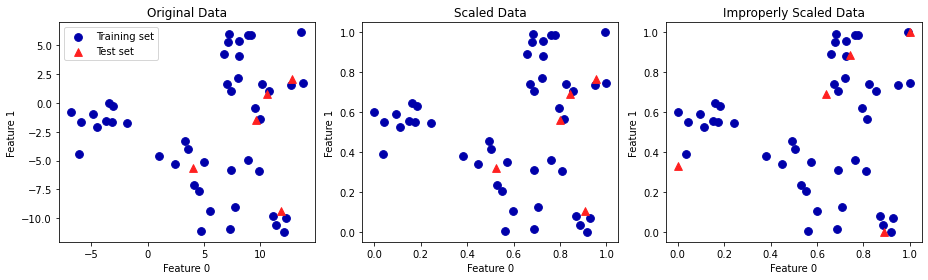

In [136]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_1train, X_1test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_1train[:, 0], X_1train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_1test[:, 0], X_1test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_1train)
X_1train_scaled = scaler.transform(X_1train)
X_1test_scaled = scaler.transform(X_1test)

# visualize the properly scaled data
axes[1].scatter(X_1train_scaled[:, 0], X_1train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_1test_scaled[:, 0], X_1test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_1scaler = MinMaxScaler()
test_1scaler.fit(X_1test)
X_1test_scaled_badly = test_1scaler.transform(X_1test)

# visualize wrongly scaled data
axes[2].scatter(X_1train_scaled[:, 0], X_1train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_1test_scaled_badly[:, 0], X_1test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [137]:
from sklearn.preprocessing import StandardScaler
ST_scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_1scaled = ST_scaler.fit(X_1train).transform(X_1train)
# same result, but more efficient computation
X_1scaled_d = ST_scaler.fit_transform(X_1train)

#### The effect of preprocessing on supervised learning

In [138]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.99


In [144]:
# preprocessing using 0-1 scaling
scaler1 = MinMaxScaler()
scaler1.fit(X_train)
X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.99


In [145]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
ST_1scaler = StandardScaler()
ST_1scaler.fit(X_train)
X_train_scaled = ST_1scaler.transform(X_train)
X_test_scaled = ST_1scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 1.00


### Dimensionality Reduction, Feature Extraction and Manifold Learning

#### Principal Component Analysis (PCA)

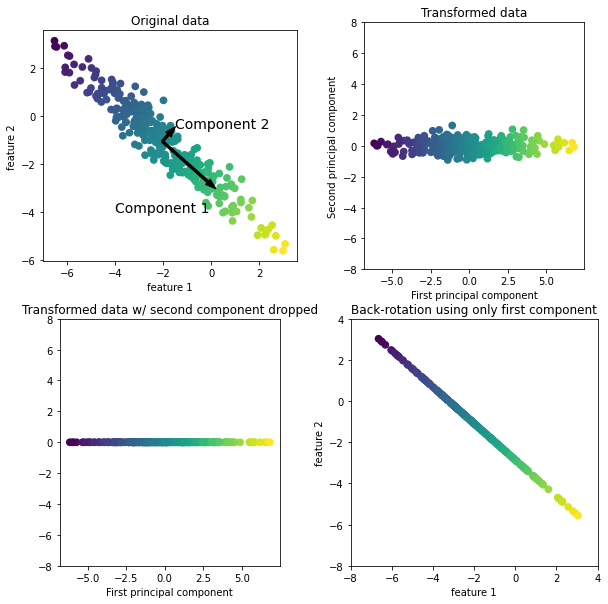

In [146]:
mglearn.plots.plot_pca_illustration()

#### Applying PCA to the cancer dataset for visualization

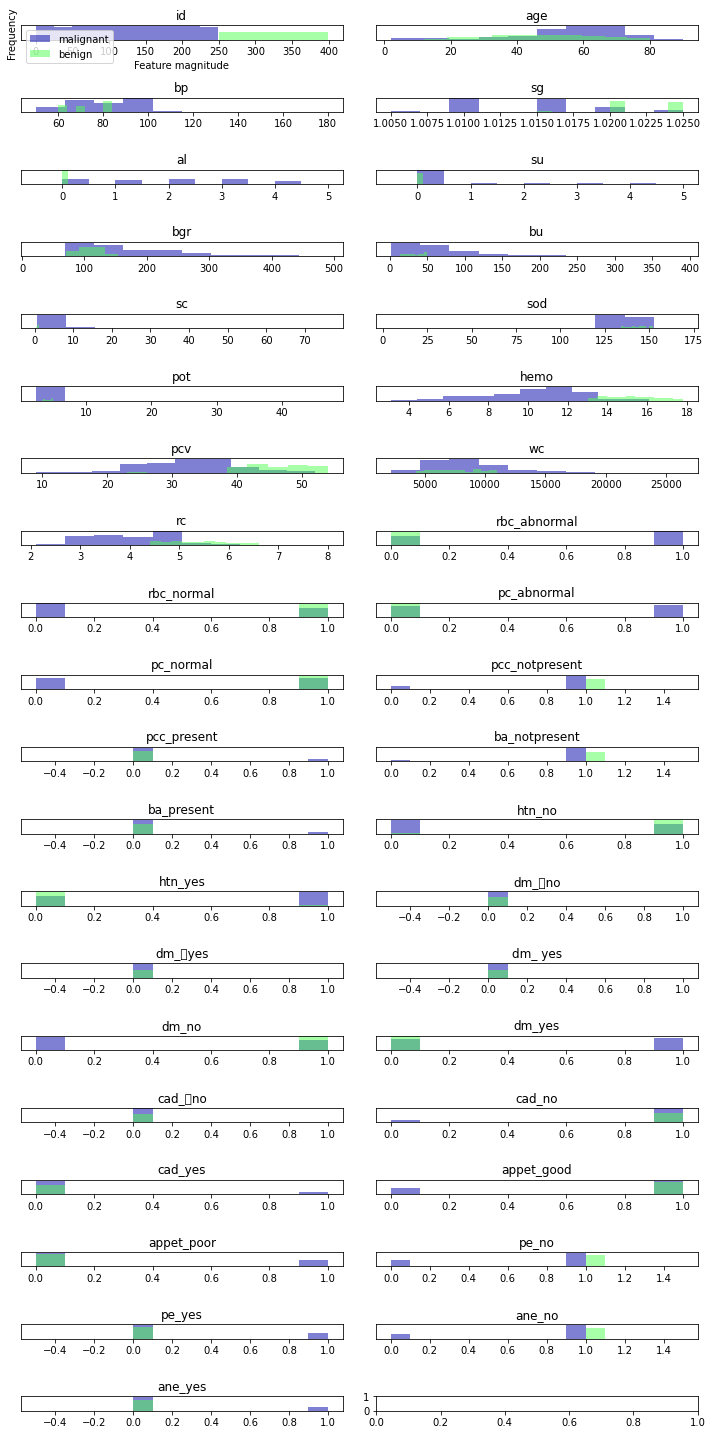

In [153]:
fig, axes = plt.subplots(20, 2, figsize=(10, 20))
malignant = data_c[data_c.classification == 'ckd']
benign = data_c[data_c.classification == 'notckd']
feature_names = list(a.columns)

ax = axes.ravel()

for c, i in enumerate(feature_names):
#     _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[c].hist(malignant[i], color=mglearn.cm3(0), alpha=.5)
    ax[c].hist(benign[i], color=mglearn.cm3(2), alpha=.5)
    ax[c].set_title(feature_names[c])
    ax[c].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [157]:
Scaler = StandardScaler()
Scaler.fit(a)
X_Scaled = Scaler.transform(a)

In [161]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_Scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_Scaled)
print("Original shape: {}".format(str(X_Scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (400, 39)
Reduced shape: (400, 2)


Text(0, 0.5, 'Second principal component')

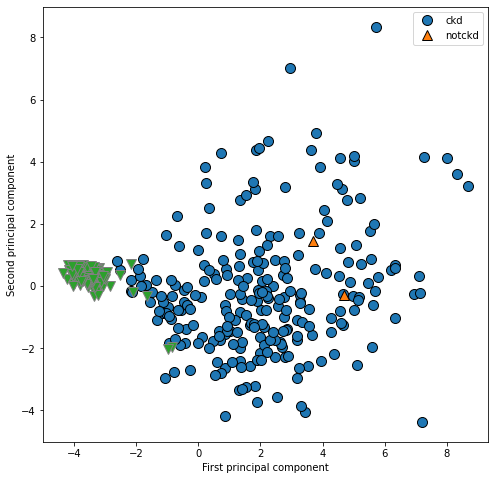

In [164]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], data_c.classification)
plt.legend(['ckd','notckd'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [165]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 39)


In [167]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.22797701  0.11141349  0.10218539 -0.19416776  0.22617827  0.10865068
   0.14573288  0.17757893  0.13436216 -0.11063135  0.03072841 -0.24622828
  -0.2384268   0.04668888 -0.21226384  0.15984841 -0.15984841  0.21562263
  -0.21562263 -0.12414136  0.12414136 -0.09096778  0.09096778 -0.23146835
   0.23146835 -0.00220782  0.01517935  0.01375355 -0.21106963  0.20990247
   0.0052098  -0.11559796  0.11715486 -0.16700547  0.16700547 -0.17089591
   0.17089591 -0.15301938  0.15301938]
 [ 0.08623795 -0.15755681 -0.07405478  0.03945549  0.09393646 -0.1812726
  -0.2329863   0.10495695 -0.01464386  0.09864765  0.0361193  -0.03735543
  -0.05538604  0.08482526 -0.04781422 -0.22216541  0.22216541  0.11953233
  -0.11953233 -0.28421268  0.28421268 -0.32749338  0.32749338  0.15473696
  -0.15473696 -0.06475483 -0.10161352 -0.02741982  0.26531429 -0.23819088
  -0.02866758  0.09975456 -0.09514057 -0.12260352  0.12260352 -0.11809515
   0.11809515 -0.16897867  0.16897867]]


Text(0, 0.5, 'Principal components')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


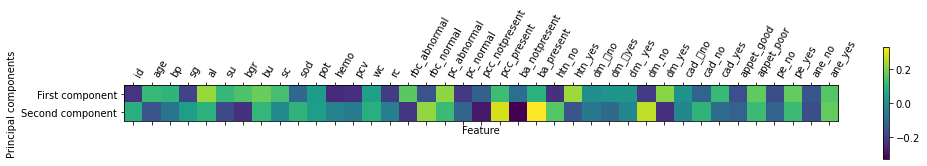

In [168]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")